In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import os
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
smiles_train = np.asarray(test['SMILES']) 
smiles_test = np.asarray(test['SMILES']) 

# Get Fingerprints

In [ ]:
def get_fingerprint(smiles_str, fp_type):
    m = Chem.MolFromSmiles(smiles_str)

    if fp_type == "RDKit":
        fp = [x for x in Chem.RDKFingerprint(m)] # n = 2048
        return fp
    elif fp_type == "MACCS":
        fp = MACCSkeys.GenMACCSKeys(m)
        return fp
    elif fp_type == "ECFP":
        fp = [x for x in Chem.AllChem.GetMorganFingerprintAsBitVect(m,2, 2048)]
        return fp
    elif fp_type == "MHFP":
        mhfp_encoder = MHFPEncoder()
        return mhfp_encoder.encode(smiles_str)
    else:
        print("key doesn't exist!")
        return 

In [ ]:
fps_train = {}
fps_test = {}
fp_types = ["ECFP","MACCS", "MHFP","RDKit"]
for fp_type in fp_types:
    fps = []
    for smiles_str in smiles_train[:]:
        cur_fp = np.asarray(get_fingerprint(smiles_str, fp_type))
        fps.append(cur_fp[:])
    fps = np.asarray(fps)
    fps_train[fp_type] = fps[:]
    
    for smiles_str in smiles_test[:]:
        cur_fp = np.asarray(get_fingerprint(smiles_str, fp_type))
        fps.append(cur_fp[:])
    fps = np.asarray(fps)
    fps_train[fp_type] = fps[:]

In [ ]:
try:
    os.mkdir('test_fingerprints')
except:
    pass
try:
    os.mkdir('train_fingerprints')
except:
    pass

In [ ]:
np.save('test_fingerprints/fp_ecfp_test.npy', fps_test['ECFP'])
np.save('test_fingerprints/fp_rdkit_test.npy', fps_test['RDKit'])
np.save('test_fingerprints/fp_MACCS_test.npy', fps_test['MACCS'])
np.save('test_fingerprints/fp_mhfp_test.npy', fps_test['MHFP'])

np.save('train_fingerprints/fp_ecfp_train.npy', fps_train['ECFP'])
np.save('train_fingerprints/fp_rdkit_train.npy', fps_train['RDKit'])
np.save('train_fingerprints/fp_MACCS_train.npy', fps_train['MACCS'])
np.save('train_fingerprints/fp_mhfp_train.npy', fps_train['MHFP'])

# Get fingerprints UMAP visualization

In [2]:
def get_umap(x):
    reducer = umap.UMAP(n_neighbors= 15)
    umap_x = reducer.fit_transform(x)
    sns.scatterplot(umap_x[:,0], umap_x[:,1])
    plt.show()
    return umap_x

C:\Users\CHI-visitor1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


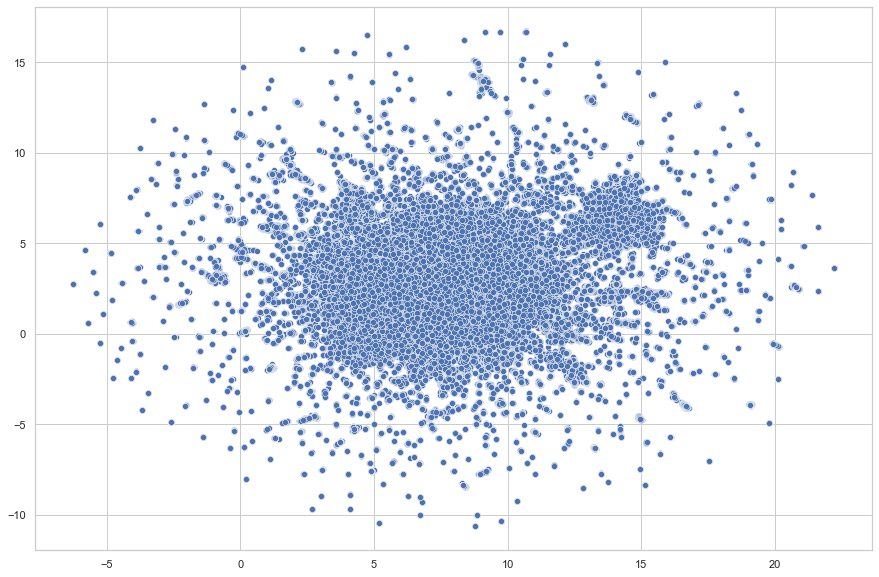

In [3]:
fp_ecfp = np.load("train_fingerprints/fp_ecfp_train.npy", allow_pickle = True)
umap_ecfp = get_umap(fp_ecfp)

C:\Users\CHI-visitor1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


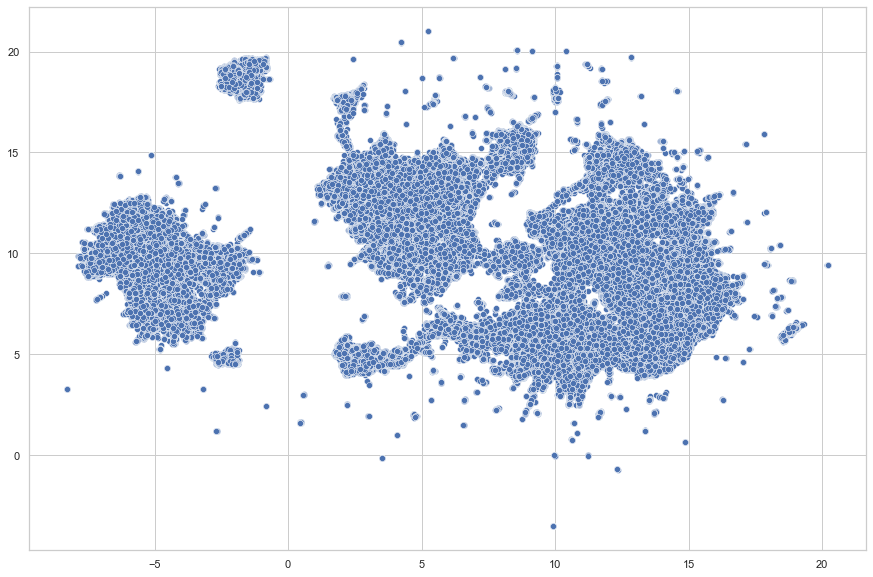

In [5]:
fp_MACCS = np.load("train_fingerprints/fp_MACCS_train.npy", allow_pickle = True)
umap_maccs = get_umap(fp_MACCS)

C:\Users\CHI-visitor1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


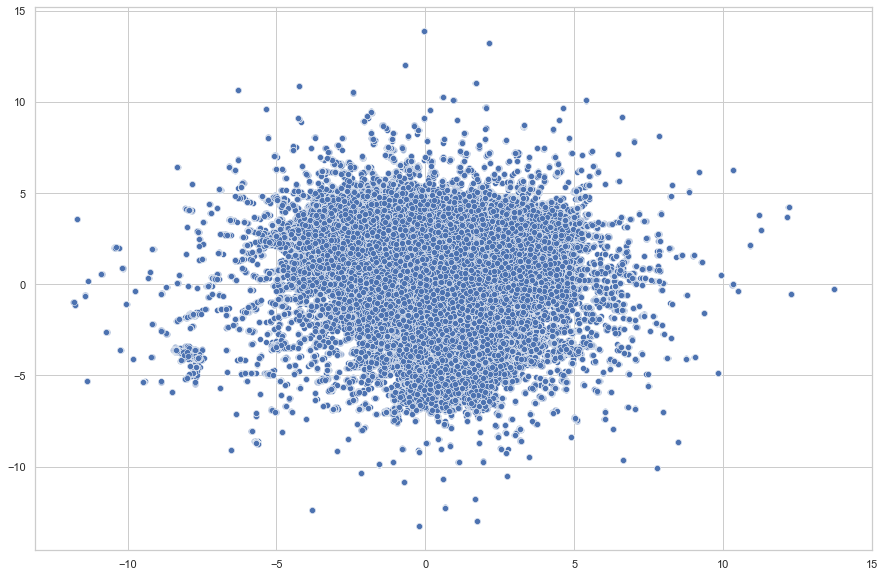

In [3]:
fp_mhfp = np.load("train_fingerprints/fp_mhfp_train.npy", allow_pickle = True)
umap_mhfp = get_umap(fp_mhfp)

C:\Users\CHI-visitor1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


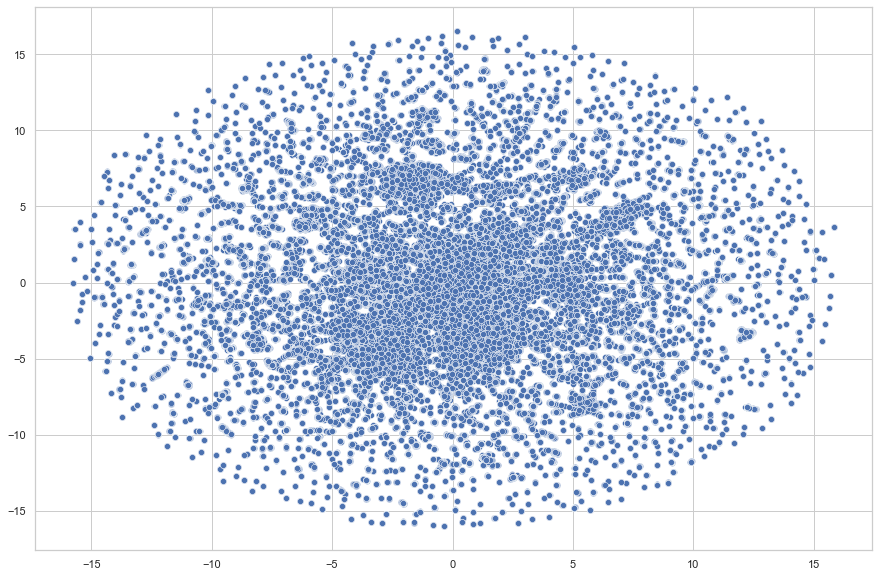

In [4]:
fp_rdkit = np.load("train_fingerprints/fp_rdkit_train.npy", allow_pickle = True)
umap_rdkit = get_umap(fp_rdkit)